# Project: EDA on 911 Dataset

## Content:
    .Introduction to Dataset
    .Wrangling and Cleaning The Data
    .EDA
    .Conclusion

### Introduction to Dataset:

#### About the Data:
The dataset contains Emergency 911 calls in Montgomery Country located in the Commonwealth of Pennsylvania, there is almost 100K calls with the following features.

#### Features:
1. lat: Latitude of emergency
2. lng: Longitude of emergency
3. desc: Describtion of emergency
4. zip: Zipcode of emergency location
5. title: Title of emergency
6. timestamp: Time of emergency occurance
7. twn: The town
8. addr: Address of emergency
9. e: Dummy variable that is always 1

With these features we will be asking these questions:
1. Most emergency reasons for the 911 calls
2. Towns with most Emergency calls
3. Checking time of the day that has high calls

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Wrangling and Cleaning
in this section, we will load the data, check for cleanliness,duplicated rows, any nulls, and any illogocal values. and we will be  correcting the wrong data types.then we will be cleaning these values.

In [2]:
df = pd.read_csv('911.csv')
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


##### First thing to notice is to remove the column 'e'  since its a dummy column, and correcting the timestamp column datatype to datetime datatype.

In [4]:
df.drop('e',axis = 1,
        inplace=True)

In [5]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [6]:
print('The data has {} samples and {} features'.format(df.shape[0],
                                                       df.shape[1]))

The data has 99492 samples and 8 features


In [7]:
#checking for nulls
print('The Data has a total of {} nulls'.format(df.isnull().sum().sum()))

The Data has a total of 13417 nulls


In [8]:
print('These nulls are located at\n{}'.format(df.isnull().sum()[df.isnull().sum() > 0]))

These nulls are located at
zip     12855
twp        43
addr      519
dtype: int64


In [9]:
# Dropping the rows with nulls in it
df.dropna(inplace= True)

In [10]:
#checking for duplicated rows
print('The number of duplicated rows:{}'.format(df.duplicated().sum()))

The number of duplicated rows:0


In [11]:
df.describe()

,lat,lng,zip
count,86576.000000,86576.000000,86576.000000
mean,40.160513,-75.316311,19237.659952
std,0.096151,0.179107,345.275446
min,30.333596,-95.595595,18036.000000
25%,40.102501,-75.398209,19038.000000
50%,40.145272,-75.301972,19401.000000
75%,40.232093,-75.206303,19446.000000
max,40.479853,-74.995041,77316.000000


##### There isn't much of quanitative features to work with.

##### we will create two columns; one that will contain the type of the emergency, while the other will be the reason of the emergency

In [12]:
df['emergency'] = df['title'].apply(lambda x : x.split(':')[0])
df['reason'] = df['title'].apply(lambda x : x.split(':')[1])
df.head(1)

,lat,lng,desc,zip,title,timeStamp,twp,addr,emergency,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY


##### we won't need the 'title' column anymore, the 'desc' column won't help with our analysis so we will remove both of these

In [13]:
df.drop(['title','desc'], axis = 1,
        inplace = True)

##### we will correct the 'zip' column to be a string instead of float

In [14]:
df['zip'] = df['zip'].apply(lambda x : str(x))

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 8 columns):
lat          86576 non-null float64
lng          86576 non-null float64
zip          86576 non-null object
timeStamp    86576 non-null datetime64[ns]
twp          86576 non-null object
addr         86576 non-null object
emergency    86576 non-null object
reason       86576 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 5.9+ MB


*its now corrected since object means string*

##### Create columns for the day, hour, month, year of the emergencies

In [16]:
df['emergency_year'] = df['timeStamp'].dt.year
df['emergency_month'] = df['timeStamp'].dt.month
df['emergency_day'] = df['timeStamp'].dt.day_name()
df['emergency_hour'] = df['timeStamp'].dt.hour

##### i'll drop the 'timestamp' column

In [17]:
df.drop('timeStamp',axis=1,
       inplace = True)

In [18]:
df.describe()

,lat,lng,emergency_year,emergency_month,emergency_hour
count,86576.000000,86576.000000,86576.000000,86576.000000,86576.000000
mean,40.160513,-75.316311,2015.920324,4.976934,13.104255
std,0.096151,0.179107,0.270792,3.008374,5.682098
min,30.333596,-95.595595,2015.000000,1.000000,0.000000
25%,40.102501,-75.398209,2016.000000,3.000000,9.000000
50%,40.145272,-75.301972,2016.000000,5.000000,13.000000
75%,40.232093,-75.206303,2016.000000,7.000000,17.000000
max,40.479853,-74.995041,2016.000000,12.000000,23.000000


### Exploratory Data Analysis

####  Research Question 1: Most emergency reasons for the 911 calls

Text(0, 0.5, 'Count')

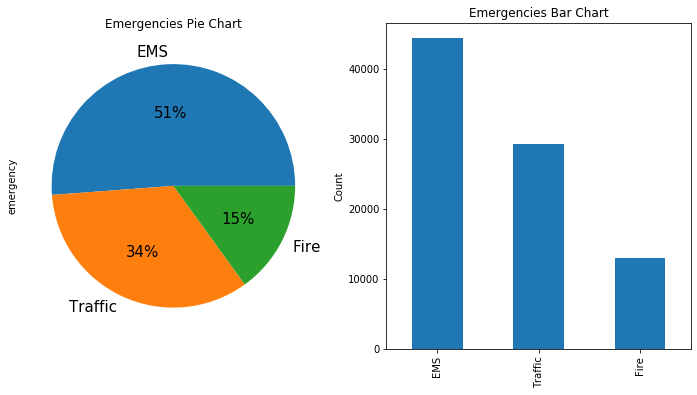

In [19]:
plt.subplot(1,2,1)
df['emergency'].value_counts().plot(kind = 'pie', figsize=(12,6), 
                                    fontsize=15, autopct='%1.0f%%')
plt.title('Emergencies Pie Chart')

###################################################################

plt.subplot(1,2,2)
df['emergency'].value_counts().plot(kind = 'bar', figsize=(12,6))
plt.title('Emergencies Bar Chart')
plt.ylabel('Count')

In [20]:
print('We have {} different reason for these emergencies'.format(df['reason'].nunique()))

We have 79 different reason for these emergencies


In [21]:
print('They are separated into\n{}'.format(df.groupby('emergency').nunique()['reason']))

They are separated into
emergency
EMS        67
Fire       33
Traffic     7
Name: reason, dtype: int64


##### The most and least three reasons for emergencies 

Text(0.5, 1.0, 'least Three reasons')

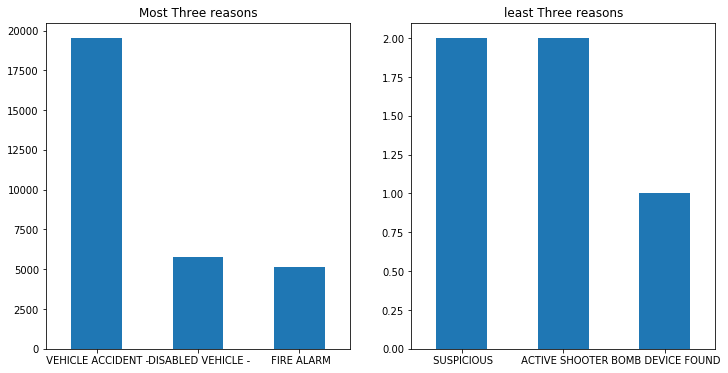

In [22]:
plt.subplot(1,2,1)
df['reason'].value_counts().head(3).plot(kind='bar',figsize=(12,6))
plt.xticks(rotation='horizontal')
plt.title('Most Three reasons')

plt.subplot(1,2,2)
df['reason'].value_counts().tail(3).plot(kind='bar',figsize=(12,6))
plt.xticks(rotation='horizontal')
plt.title('least Three reasons')

In [23]:
print('The most emergency for EMS is {}'.format(df[df['emergency'] == 'EMS']['reason'].value_counts().index[0]))

The most emergency for EMS is  RESPIRATORY EMERGENCY


In [24]:
print('The most emergency for Traffic is {}'.format(df[df['emergency'] == 'Traffic']['reason'].value_counts().index[0]))

The most emergency for Traffic is  VEHICLE ACCIDENT -


In [25]:
print('The most emergency for Fire is {}'.format(df[df['emergency'] == 'Fire']['reason'].value_counts().index[0]))

The most emergency for Fire is  FIRE ALARM


#### Research Question 2: Towns with most Emergency calls

In [26]:
print('we have {} unique towns'.format(df['twp'].nunique()))

we have 67 unique towns


In [27]:
top_towns = df['twp'].value_counts().index[:5]
df_towns = df[df['twp'].isin(top_towns)]

In [28]:
print('The top five towns in all emergency occurance are\n{}'.format(list(top_towns)))

The top five towns in all emergency occurance are
['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'POTTSTOWN', 'CHELTENHAM']


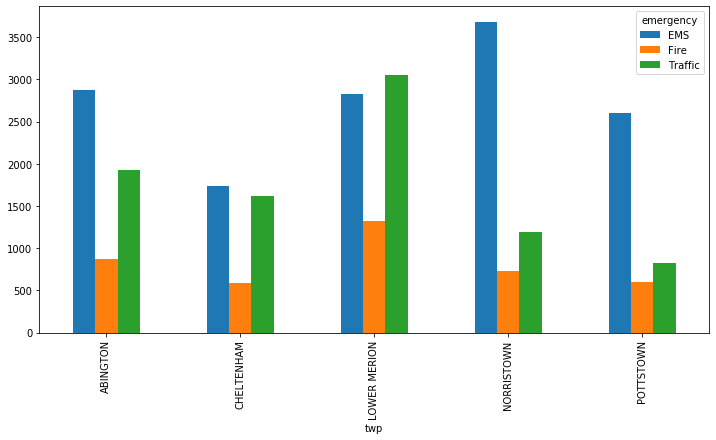

In [29]:
pd.crosstab(df_towns['twp'],df_towns['emergency']).plot(kind='bar',
                                                        figsize=(12,6));

In [30]:
print('The most town for EMS emergency is {}'.format(df[df['emergency'] == 'EMS']['twp'].value_counts().index[0]))

The most town for EMS emergency is NORRISTOWN


In [31]:
print('The most town for Traffic emergency is {}'.format(df[df['emergency'] == 'Traffic']['twp'].value_counts().index[0]))

The most town for Traffic emergency is LOWER MERION


In [32]:
print('The most town for Fire emergency is {}'.format(df[df['emergency'] == 'Fire']['twp'].value_counts().index[0]))

The most town for Fire emergency is LOWER MERION


#### Research Question 3: Checking times that had high calls

In [33]:
df['emergency_year'].value_counts()

2016    79678
2015     6898
Name: emergency_year, dtype: int64

##### since the data was mostly collected in 2016, we won't explore by year

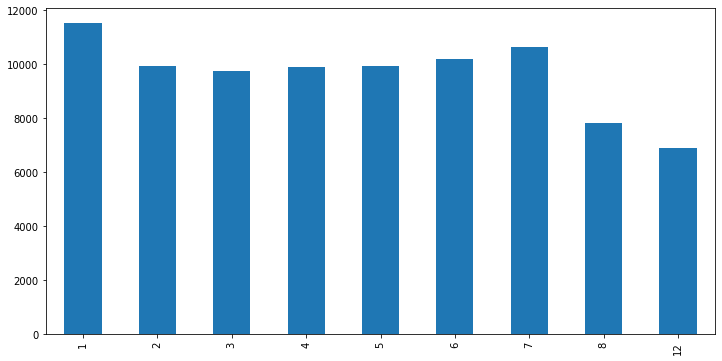

In [40]:
df['emergency_month'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))

##### January had the highest emergency calls

Text(0, 0.5, 'Count')

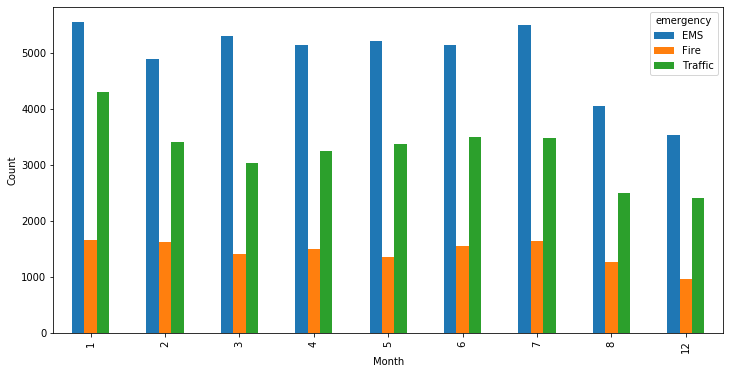

In [35]:
pd.crosstab(df['emergency_month'],df['emergency']).plot(kind='bar',
                                                        figsize=(12,6));
plt.xlabel('Month')
plt.ylabel('Count')

##### it also seems that january has the highest emergency calls for each section

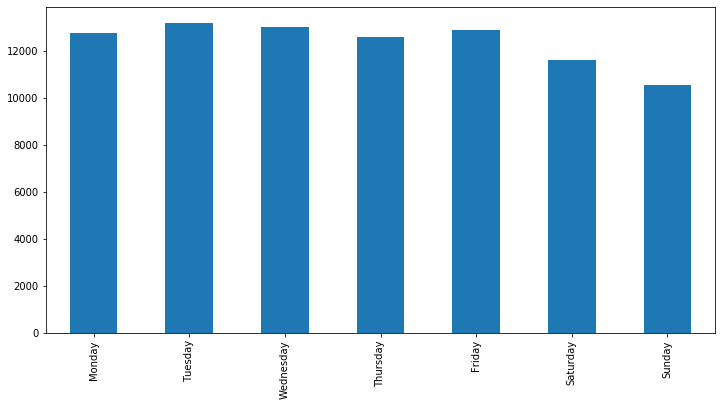

In [36]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['emergency_day'].value_counts().reindex(days).plot(kind='bar',figsize=(12,6))

##### Tuesday is highest but they all are kinda simillar

Text(0, 0.5, 'Count')

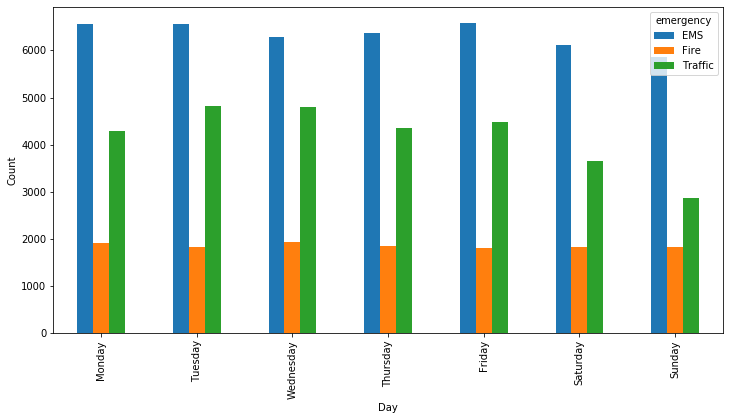

In [37]:
pd.crosstab(df['emergency_day'],df['emergency']).reindex(days).plot(kind='bar',
                                                        figsize=(12,6));
plt.xlabel('Day')
plt.ylabel('Count')

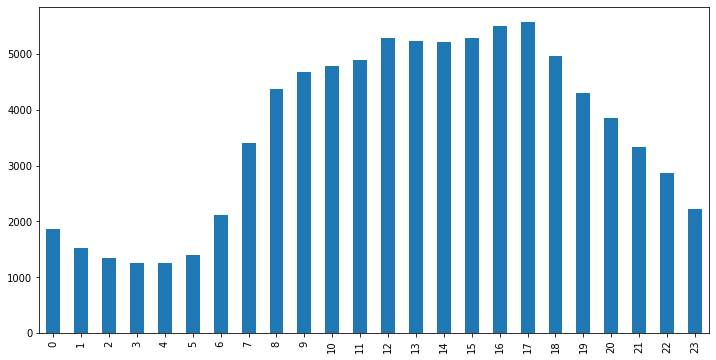

In [42]:
df['emergency_hour'].value_counts().sort_index().plot(kind='bar',figsize=(12,6))

##### 5 PM has the highest calls

Text(0, 0.5, 'Count')

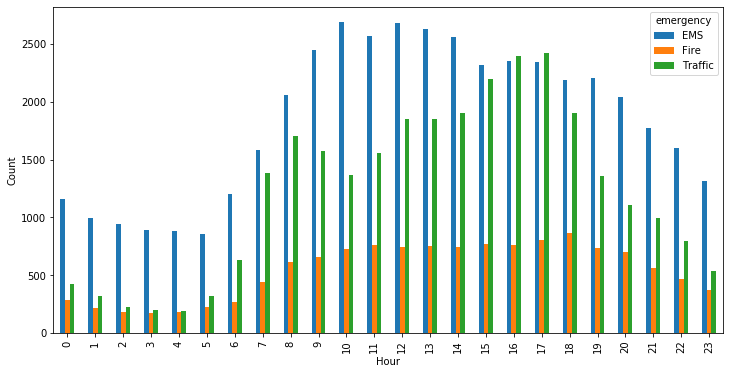

In [43]:
pd.crosstab(df['emergency_hour'],df['emergency']).plot(kind='bar',
                                                        figsize=(12,6));
plt.xlabel('Hour')
plt.ylabel('Count')

In [52]:
print('The most hour for EMS emergency is {}'.format(df[df['emergency'] == 'EMS']['emergency_hour'].value_counts().index[0]))

The most hour for EMS emergency is 10


In [53]:
print('The most hour for Traffic emergency is {}'.format(df[df['emergency'] == 'Traffic']['emergency_hour'].value_counts().index[0]))

The most hour for Traffic emergency is 17


In [54]:
print('The most hour for Fire emergency is {}'.format(df[df['emergency'] == 'Fire']['emergency_hour'].value_counts().index[0]))

The most hour for Fire emergency is 18


### we can say that at Jan, each Tuesday at 5 PM had the highest emergency calls

## Conclusions

This dataset collects information from 100k Emergency calls in Montgomery Country located in the Commonwealth of Pennsylvania.

This code uses pandas and matplotlib with good documentation at each step.

After finding out that 50% of calls were EMS, 35% were Traffic, and 15% were Fire, We stated these questions:

Towns with most Emergency calls
Checking time of the day that has high calls

1. What are the most emergencies and that reason behind that emergency?

        It seemed that most of the emergency were for EMS, them Traffic, and then Fire.                                                               
            .The most emergency for EMS is  RESPIRATORY EMERGENCY               
            .The most emergency for Traffic is  VEHICLE ACCIDENT                
            .The most emergency for Fire is  FIRE ALARM


2. What are the towns with high emergency calls?
        we had 67 unique towns in the dataset, and the top five towns in all emergency occurances are: LOWER MERION, ABINGTON, NORRISTOWN, POTTSTOWN and CHELTENHAM.
    
        .The most town for EMS emergency is NORRISTOWN.
        .The most town for Traffic emergency is LOWER MERION.
        .The most town for Fire emergency is LOWER MERION.
   
   
3. The time with high frequency of calls?
        since the data was mostly collected in 2016, we didn't explore by year.
        January highest emergency calls for each section.
        Tuesday is highest in days, but they all are kinda uniform over the week.
        5 PM has the highest calls

The Limitation of this data analysis is:

    1- we are working with a sample data which implies uncertainty, for example what about different time of the year